# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.013474e+01     9.385289e+00
 * time: 0.0025610923767089844
     1     2.959728e+01     4.798949e+00
 * time: 0.06592512130737305
     2     2.185249e+01     5.523702e+00
 * time: 0.07545113563537598
     3     1.631254e+01     5.419972e+00
 * time: 0.08472204208374023
     4     1.232665e+01     2.607638e+00
 * time: 0.09393906593322754
     5     1.032856e+01     1.061047e+00
 * time: 0.1030130386352539
     6     9.698218e+00     1.408575e+00
 * time: 0.11073899269104004
     7     9.229210e+00     1.025044e+00
 * time: 0.11819195747375488
     8     8.840192e+00     9.872141e-01
 * time: 0.12562203407287598
     9     8.568499e+00     6.538976e-01
 * time: 0.132918119430542
    10     8.363836e+00     6.252925e-01
 * time: 0.14032196998596191
    11     8.240109e+00     6.669092e-01
 * time: 0.14806795120239258
    12     8.108892e+00     5.463234e-01
 * time: 0.1561579704284668
    13     8.000438e+00     3.908358e-01
 * time: 0

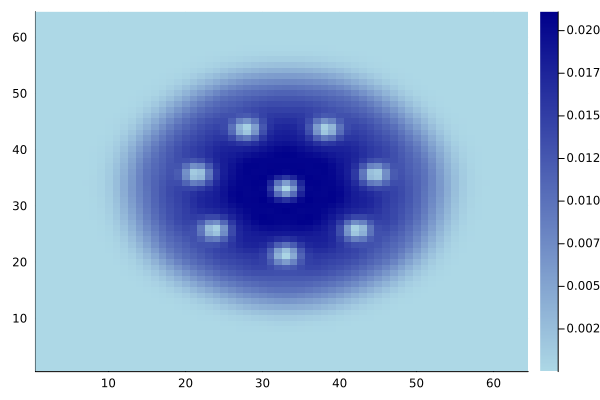

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)